# Banking Scenario

A bank ABC is on a digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers vs asset customers.</br>
**Liability Customer** - the one who deposits into the bank (depositors).
</br>**Asset Customer** - the one who borrows from the bank (borrowers).
</br>The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. 

## Information about the Data

The data consists of the following attributes: 
> 1. ID - Customer ID 
2. Age - Customer’s age. 
3. CustomerSince - Customer of the bank since (years). 
4. HighestSpend - Customer’s highest spend so far in single transaction. 
5. ZipCode - Customer’s zip code. 
6. HiddenScore - A score associated to the customer which is masked by the bank. 
7. MonthlyAverageSpend - Customer’s monthly average spend. 
8. Level - A level associated to the customer which is masked by the bank. 
9. Mortgage - Customer’s mortgage, if any. 
10. Security - Customer’s security asset with the bank. 
11. FixedDepositAccount - Customer’s fixed deposit account with the bank. 
12. InternetBanking - whether the customer uses internet banking. 
13. CreditCard - whether the customer uses bank’s credit card. 
14. LoanOnCard - whether the customer has a loan on credit card. 

## Project Objective

Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset. Steps and tasks: <br/>
> **1. Import and warehouse data:**<br/>
<font color='blue'> • Import all the given datasets and explore shape and size of each.<br/>
• Merge all datasets onto one and explore final shape and size.</font><br/>
**2. Data cleansing:**<br/>
<font color='blue'>• Explore and if required correct the datatypes of each attribute.<br/>
• Explore for null values in the attributes and if required drop or impute values. </font><br/>
**3. Data analysis & visualisation:**<br/>
<font color='blue'>• Perform detailed statistical analysis on the data. <br/>
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. </font><br/>
**4. Data pre-processing:** <br/>
<font color='blue'>• Segregate predictors vs target attributes.<br/>
• Check for target balancing and fix it if found imbalanced. <br/>
• Perform train-test split. </font><br/>
**5. Model training, testing and tuning:**<br/>
<font color='blue'>• Design and train a Logistic regression and Naive Bayes classifiers.<br/>
• Display the classification accuracies for train and test data.<br/>
• Display and explain the classification report in detail.<br/>
• Apply all the possible tuning techniques to train the best model for the given data.<br/>
Select the final best trained model with your comments for selecting this model. </font><br/>
**6. Conclusion and improvisation:**<br/>
<font color='blue'>• Write your conclusion on the results. </font><br/>

## Import Libraries and Packages

In [1]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.34.0 to work with workathon-aml


In [2]:
# Importing Libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm

In [3]:
# used to supress display of warnings
import warnings
# suppress display of warnings
warnings.filterwarnings('ignore')

## Import and merge  data

In [4]:
#import the dataset library
from azureml.core import Dataset

#Read Datasets from registered Datasets
part1 = Dataset.get_by_name(ws, name='Dataset1')
part1=part1.to_pandas_dataframe()
part2 = Dataset.get_by_name(ws, name='Dataset2')
part2=part2.to_pandas_dataframe()

#Remove duplicates from the datasets
part1_nodups = part1.drop_duplicates()
part2_nodups = part2.drop_duplicates()

#Merge the 2 datasets to create the final datasets.
Data=pd.merge(left=part1, right=part2, on=['ID'])

In [5]:
#preview original dataset1.
part1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [6]:
#Preview original dataset2.
part2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [7]:
#Preview your Data
Data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


## Data Cleansing

In [8]:
#Displpay the number of rows and columns of your final dataset "Data".
Data.shape

(5000, 14)

In [9]:
#Check number of values less than zero in the dataframe.
(Data<0).sum()

ID                      0
Age                     0
CustomerSince          52
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard              0
dtype: int64

In [10]:
#Display all the values less than zero from "CustomerSince" column.
Data[Data['CustomerSince']<0]['CustomerSince']

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: CustomerSince, dtype: int64

In [11]:
#Display the data type of each column. 
Data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [12]:
#Check for null balue in the dataframe. 
Data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [13]:
#Check for non-numeric value in any column. 
Data.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [14]:
#Describe the data after transposing. 
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [15]:
#Show unique values in the LoadOnCard Column. 
Data.LoanOnCard.unique()

array([nan,  1.,  0.])

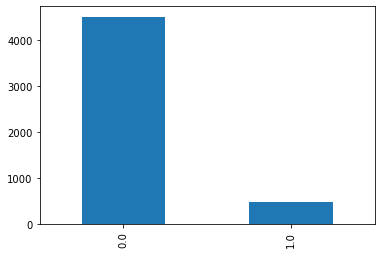

In [16]:
#Show the distribution of data in LoanOnCard Column. 
Data['LoanOnCard'].value_counts().plot(kind='bar')

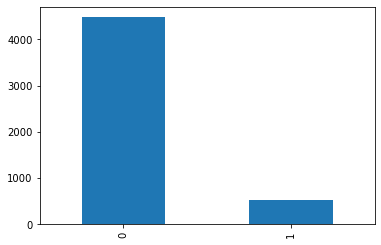

In [17]:
#Show the distribution of data in Security Column
Data['Security'].value_counts().plot(kind='bar')

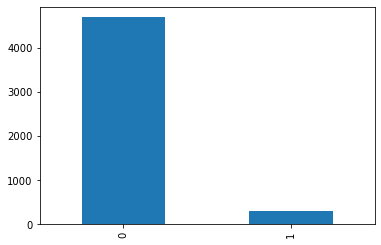

In [18]:
#Show the distribution of data in FixedDepositAccount Column
Data['FixedDepositAccount'].value_counts().plot(kind='bar')

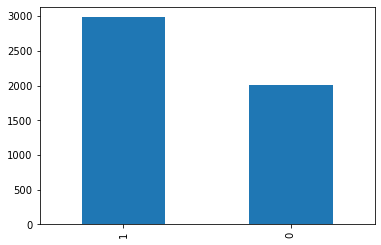

In [19]:
#Show the distribution of data in InternetBanking Column
Data['InternetBanking'].value_counts().plot(kind='bar')

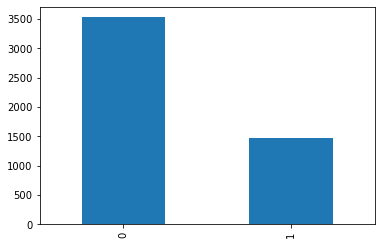

In [20]:
#Show the distribution of data in CreditCard Column
Data['CreditCard'].value_counts().plot(kind='bar')

In [21]:
# every column's missing value is replaced with 0 respectively . In this case LoanOnCard which is our target/outcome variable
Data = Data.dropna(axis=0)
Data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [22]:
#Check for non numeric value in the dataframe, again.
Data.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [23]:
# The Customer ID attribute 'ID' does not influence the conversion to potential customers for loanoncard 
# so dropping the 'ID' attribute
# Assuming that the 'Zipcode' (in other words 'area') of the customers does not influence the 
# conversion to potential customers for loanoncard. So dropping the 'Zipcode' attribute
Data = Data.drop('ID', axis =1 ) 
Data = Data.drop('ZipCode', axis =1 )

In [24]:
#Display the data now. 
Data

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


## Data Exploration, Analysis and Visualisation

### Univariate Analysis
**What is univariate analysis?**

> Univariate analysis means the analysis of data having only one variable and doesnt deal with relationships or causes betwen variable in case there are more. It is essentially used to describe the data. As a part of univariate analysis - we will analyse the categorical variables like Age, CustomerSince, FixedDepositAccount, CreditCard, Security & InternetBanking variables independently. 

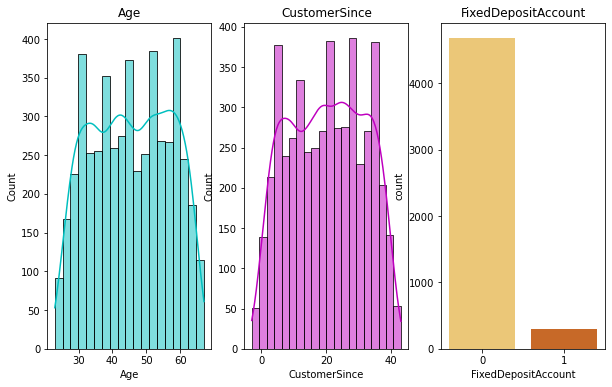

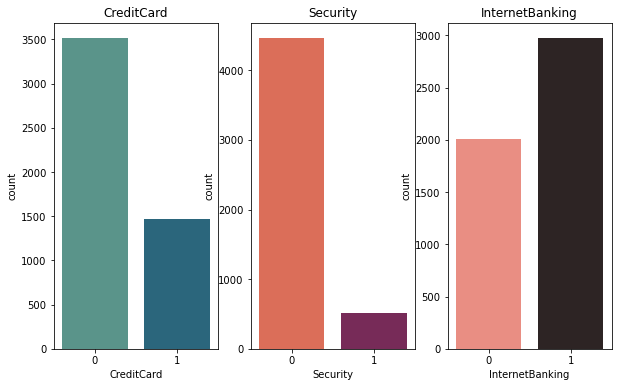

In [133]:
plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
plt.title('Age')
sns.histplot(Data['Age'],color='c', kde=True)


plt.subplot(1, 3, 2)
plt.title('CustomerSince')
sns.histplot(Data['CustomerSince'],color='m',kde=True)


plt.subplot(1, 3, 3)
plt.title('FixedDepositAccount')
sns.countplot(data = Data, x= 'FixedDepositAccount', palette = "YlOrBr")

plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
plt.title('CreditCard')
sns.countplot(data = Data, x= 'CreditCard', palette = "crest")


plt.subplot(1, 3, 2)
plt.title('Security')
sns.countplot(data = Data, x= 'Security',palette = "rocket_r")


plt.subplot(1, 3, 3)
plt.title('InternetBanking')
sns.countplot(data = Data, x= 'InternetBanking',palette = "dark:salmon_r")


plt.show()

As a part of univariate analysis - we will analyse the categorical variables like Age, CustomerSince, FixedDepositAccount, CreditCard, Security & InternetBanking variables independently.

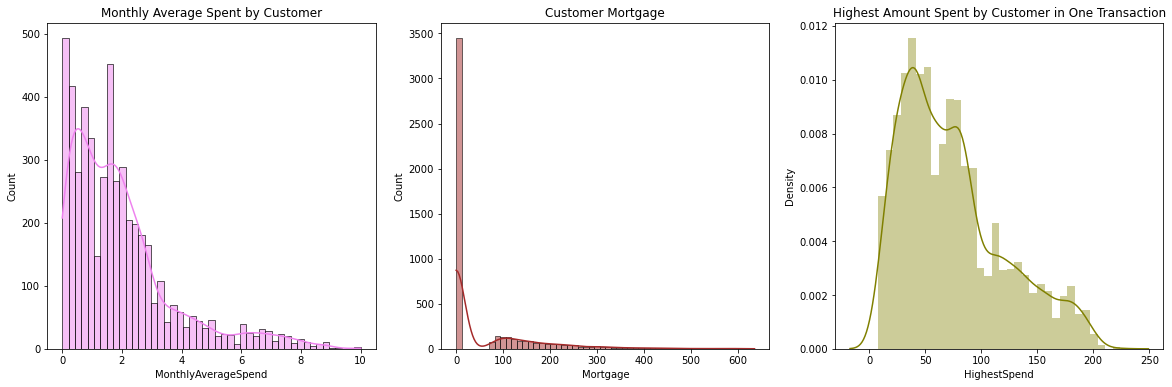

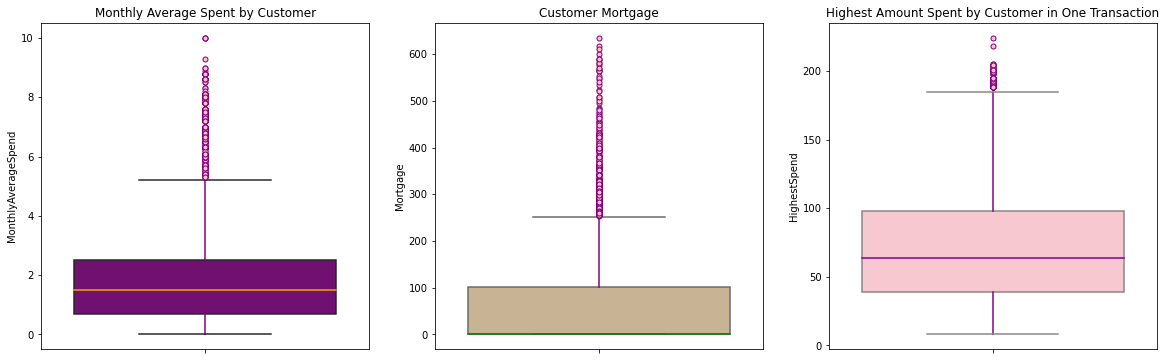

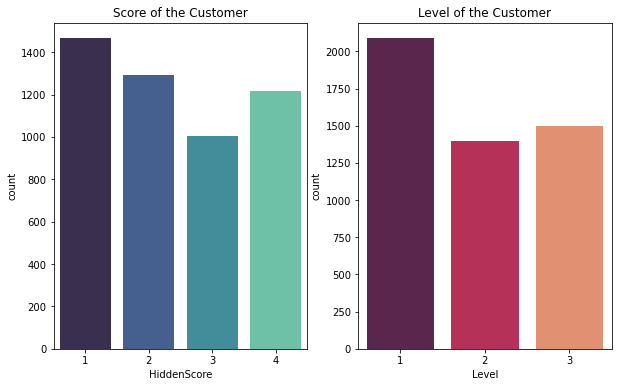

In [145]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Monthly Average Spent by Customer')
sns.histplot(Data['MonthlyAverageSpend'],color='violet',kde=True)


plt.subplot(1, 3, 2)
plt.title('Customer Mortgage')
sns.histplot(Data['Mortgage'],color='brown',kde=True)


plt.subplot(1, 3, 3)
plt.title('Highest Amount Spent by Customer in One Transaction')
sns.distplot(Data['HighestSpend'],color='olive',kde=True)


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Monthly Average Spent by Customer')
sns.boxplot(y=Data['MonthlyAverageSpend'],orient='vertical',color='purple', whiskerprops=dict(color='purple'),
            flierprops=dict(marker='o', markerfacecolor='pink', markeredgecolor='purple'),medianprops=dict(color='orange'))


plt.subplot(1, 3, 2)
plt.title('Customer Mortgage')
sns.boxplot(y=Data['Mortgage'],orient='vertical',color='tan', whiskerprops=dict(color='purple'),
            flierprops=dict(marker='o', markerfacecolor='pink', markeredgecolor='purple'),medianprops=dict(color='green'))


plt.subplot(1, 3, 3)
plt.title('Highest Amount Spent by Customer in One Transaction')
sns.boxplot(y=Data['HighestSpend'],orient='vertical',color='pink', whiskerprops=dict(color='purple'),
            flierprops=dict(marker='o', markerfacecolor='pink', markeredgecolor='purple'),medianprops=dict(color='purple'))


plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.title('Score of the Customer')
sns.countplot(data = Data, x= 'HiddenScore',palette = "mako")


plt.subplot(1, 2, 2)
plt.title('Level of the Customer')
sns.countplot(data = Data, x= 'Level', palette = "rocket")

plt.show()

## Bivariate Analysis
**What is Bivariate Analysis?**

> It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

In [29]:
cor = Data[['Age' ,'CustomerSince','HighestSpend' , 'HiddenScore', 'MonthlyAverageSpend', 'Level','Mortgage','Security', 'FixedDepositAccount' , 'InternetBanking', 'CreditCard', 'LoanOnCard']].corr()

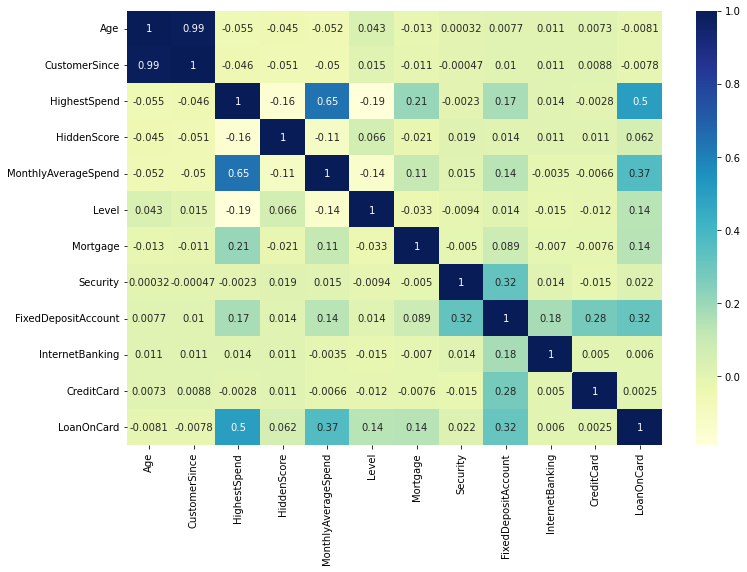

In [30]:
fig = plt.gcf()  # or by other means, like plt.subplots
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)  # scale current size by 1.5
sns.heatmap(cor,annot=True,cmap='YlGnBu')

## Multivariate Analysis
**What is Multivariate Analysis?**

> Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable, and the techniques are especially valuable when working with correlated variables.

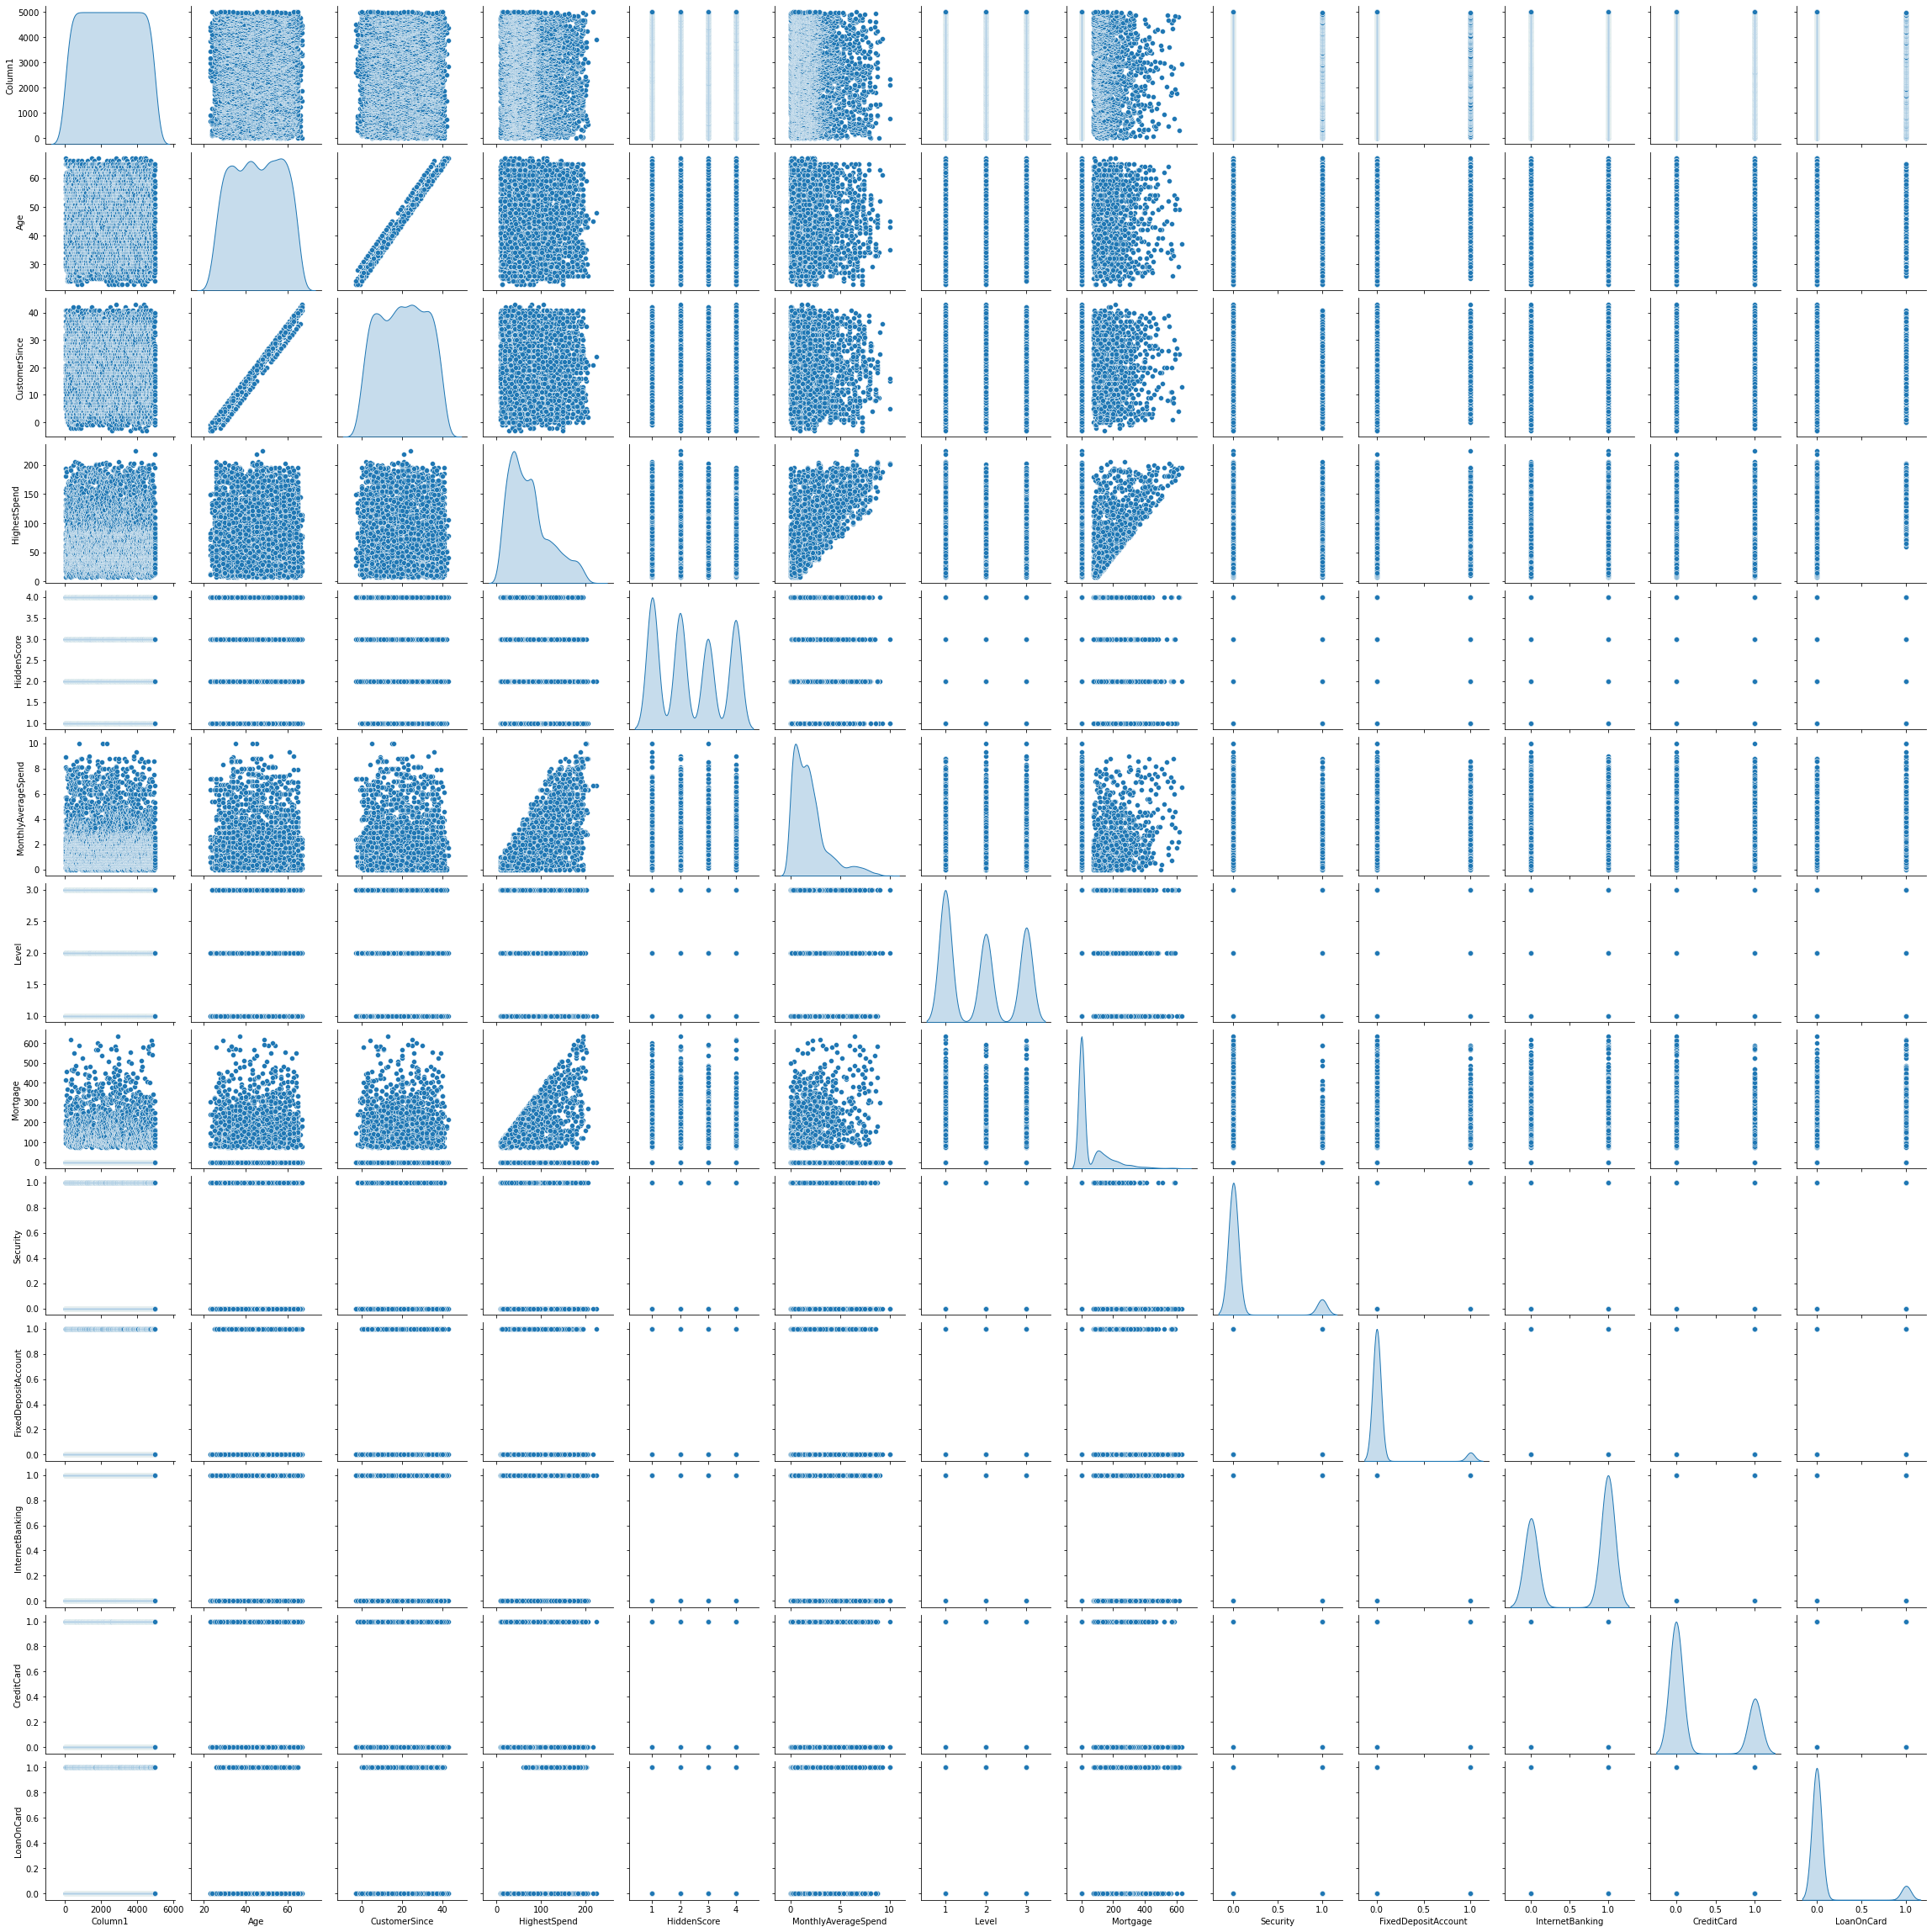

In [31]:
sns.pairplot(Data,diag_kind='kde')

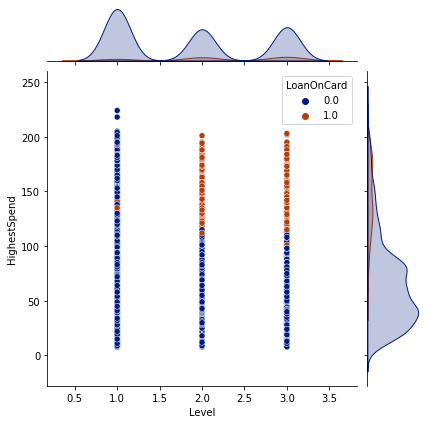

In [149]:
sns.set_palette("dark")
sns.jointplot(Data['Level'], Data['HighestSpend'],hue=Data['LoanOnCard'])

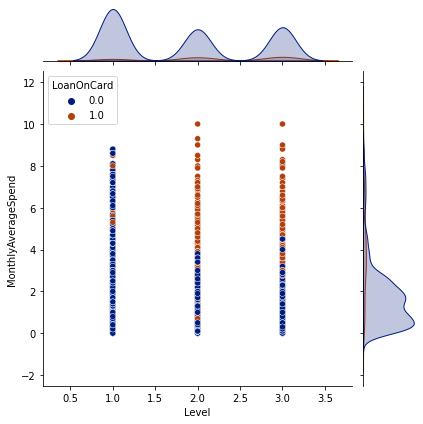

In [150]:
sns.jointplot(Data['Level'], Data['MonthlyAverageSpend'],hue=Data['LoanOnCard'])

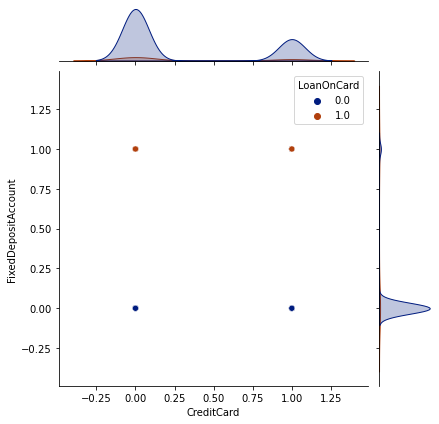

In [151]:
sns.jointplot(Data['CreditCard'], Data['FixedDepositAccount'],hue=Data['LoanOnCard'])

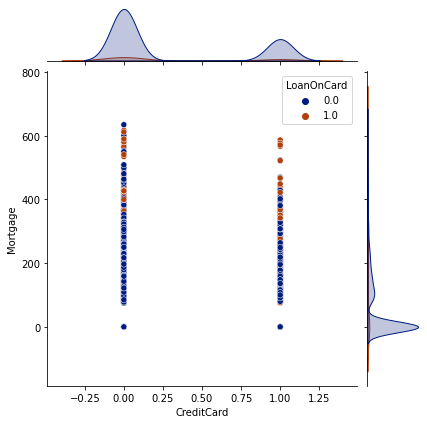

In [152]:
sns.jointplot(Data['CreditCard'], Data['Mortgage'],hue=Data['LoanOnCard']);

In [36]:
#Display the columns of the Dataframe.
Data.columns

Index(['Column1', 'Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [37]:
Data.head()

,Column1,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
1,10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
2,11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
3,12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
4,13,59,32,40,4,2.5,2,0,0,0,1,0,0.0


In [156]:
Data["LoanOnCard"].value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

## Data Preprocessing For Modelling

### Treating Imbalanced Data

In [41]:
# Separate majority and minority classes
df_loan = Data[Data.LoanOnCard==1]
df_noloan = Data[Data.LoanOnCard==0]

# Upsample minority class 1
df_loan_upsampled = resample(df_loan, replace=True, n_samples=4500, random_state=11)

# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([df_noloan, df_loan_upsampled])

# Dsiplay new class counts
df_upsampled.LoanOnCard.value_counts()

1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64

In [42]:
# Upsample minority class 1
df_loan_upsampled_70 = resample(df_loan, replace=True, n_samples=3500, random_state=13)

# Combine majority class with upsampled minority classes
df_upsampled_70 = pd.concat([df_noloan, df_loan_upsampled_70])

# Dsiplay new class counts
df_upsampled_70.LoanOnCard.value_counts()

0.0    4500
1.0    3500
Name: LoanOnCard, dtype: int64

In [43]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 1 to 2687
Data columns (total 13 columns):
Column1                9000 non-null int64
Age                    9000 non-null int64
CustomerSince          9000 non-null int64
HighestSpend           9000 non-null int64
HiddenScore            9000 non-null int64
MonthlyAverageSpend    9000 non-null float64
Level                  9000 non-null int64
Mortgage               9000 non-null int64
Security               9000 non-null int64
FixedDepositAccount    9000 non-null int64
InternetBanking        9000 non-null int64
CreditCard             9000 non-null int64
LoanOnCard             9000 non-null float64
dtypes: float64(2), int64(11)
memory usage: 984.4 KB


In [44]:
df_upsampled_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1 to 2986
Data columns (total 13 columns):
Column1                8000 non-null int64
Age                    8000 non-null int64
CustomerSince          8000 non-null int64
HighestSpend           8000 non-null int64
HiddenScore            8000 non-null int64
MonthlyAverageSpend    8000 non-null float64
Level                  8000 non-null int64
Mortgage               8000 non-null int64
Security               8000 non-null int64
FixedDepositAccount    8000 non-null int64
InternetBanking        8000 non-null int64
CreditCard             8000 non-null int64
LoanOnCard             8000 non-null float64
dtypes: float64(2), int64(11)
memory usage: 875.0 KB


## Model Preparation
### Split Data set into Train and Test data

In [45]:
X = Data.drop(['LoanOnCard'],axis=1)
y = Data.LoanOnCard

In [46]:
X_full = df_upsampled.drop(['LoanOnCard'],axis=1)
y_full = df_upsampled.LoanOnCard

In [47]:
X_70 = df_upsampled_70.drop(['LoanOnCard'],axis=1)
y_70 = df_upsampled_70.LoanOnCard

In [48]:
# Split train and test with un-sampled target data at 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3984, 12)
(996, 12)
(3984,)
(996,)


In [49]:
# Split train and test data (target fully sampled) at 80:20 ratio
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.20, random_state=1)
print(X_full_train.shape)
print(X_full_test.shape)
print(y_full_train.shape)
print(y_full_test.shape)

(7200, 12)
(1800, 12)
(7200,)
(1800,)


In [50]:
# Split train and test data at 80:20 ratio
X_70_train, X_70_test, y_70_train, y_70_test = train_test_split(X_70, y_70, test_size=0.20, random_state=1)
print(X_70_train.shape)
print(X_70_test.shape)
print(y_70_train.shape)
print(y_70_test.shape)

(6400, 12)
(1600, 12)
(6400,)
(1600,)


## Apply Logistic Regression  with lbfgs solver

In [51]:
LoR_lbfgs_classifier = LogisticRegression(solver = 'lbfgs', multi_class= 'auto', max_iter=200)
LoR_lbfgs_model = LoR_lbfgs_classifier.fit(X_train, y_train)
LoR_lbfgs_model_full = LoR_lbfgs_classifier.fit(X_full_train, y_full_train)
LoR_lbfgs_model_70 = LoR_lbfgs_classifier.fit(X_70_train, y_70_train)

In [52]:
y_LoR_lbfgs_pred = LoR_lbfgs_model.predict(X_test)
y_full_LoR_lbfgs_pred = LoR_lbfgs_model_full.predict(X_full_test)
y_70_LoR_lbfgs_pred = LoR_lbfgs_model_70.predict(X_70_test)

In [53]:
print('confusion_matrix for LoR model with lbfgs solver and no target sampling:- \n', confusion_matrix(y_test,y_LoR_lbfgs_pred))
print('confusion_matrix for LoR model with lbfgs solver and full target sampling:- \n', confusion_matrix(y_full_test,y_full_LoR_lbfgs_pred))
print('confusion_matrix for LoR model with lbfgs solver and 70 percent target sampling:- \n', confusion_matrix(y_70_test,y_70_LoR_lbfgs_pred))

confusion_matrix for LoR model with lbfgs solver and no target sampling:- 
 [[800  92]
 [ 13  91]]
confusion_matrix for LoR model with lbfgs solver and full target sampling:- 
 [[782 108]
 [103 807]]
confusion_matrix for LoR model with lbfgs solver and 70 percent target sampling:- 
 [[781 113]
 [ 91 615]]


In [54]:
print('Accuracy Score for LoR model with lbfgs solver and no target sampling:- ', LoR_lbfgs_model.score(X_train, y_train))
print('Accuracy Score for LoR model with lbfgs solver and no target sampling:- ', LoR_lbfgs_model.score(X_test, y_test))
print ('________________________________________________________________________')
print('Accuracy Score for LoR model with lbfgs solver and full target sampling:- ', LoR_lbfgs_model_full.score(X_full_train, y_full_train))
print('Accuracy Score for LoR model with lbfgs solver and full target sampling:- ', LoR_lbfgs_model_full.score(X_full_test, y_full_test))
print ('________________________________________________________________________')
print('Accuracy Score for LoR model with lbfgs solver and 70 percent target sampling:- ', LoR_lbfgs_model_70.score(X_70_train, y_70_train))
print('Accuracy Score for LoR model with lbfgs solver and 70 percent target sampling:- ', LoR_lbfgs_model_70.score(X_70_test, y_70_test))


Accuracy Score for LoR model with lbfgs solver and no target sampling:-  0.8920682730923695
Accuracy Score for LoR model with lbfgs solver and no target sampling:-  0.8945783132530121
________________________________________________________________________
Accuracy Score for LoR model with lbfgs solver and full target sampling:-  0.8847222222222222
Accuracy Score for LoR model with lbfgs solver and full target sampling:-  0.8827777777777778
________________________________________________________________________
Accuracy Score for LoR model with lbfgs solver and 70 percent target sampling:-  0.8909375
Accuracy Score for LoR model with lbfgs solver and 70 percent target sampling:-  0.8725


In [55]:
print('classification report for LoR model with lbfgs solver and no target sampling:- \n', classification_report(y_test, y_LoR_lbfgs_pred))
print('----------------------------------------------------------------------------------')
print('classification report for LoR model with lbfgs solver and full target sampling:- \n', classification_report(y_full_test, y_full_LoR_lbfgs_pred))
print('----------------------------------------------------------------------------------')
print('classification report for LoR model with lbfgs solver and 70 percent target sampling:- \n', classification_report(y_70_test, y_70_LoR_lbfgs_pred))

classification report for LoR model with lbfgs solver and no target sampling:- 
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       892
         1.0       0.50      0.88      0.63       104

    accuracy                           0.89       996
   macro avg       0.74      0.89      0.79       996
weighted avg       0.93      0.89      0.91       996

----------------------------------------------------------------------------------
classification report for LoR model with lbfgs solver and full target sampling:- 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       890
         1.0       0.88      0.89      0.88       910

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800

----------------------------------------------------------------------------------
classification r

## Apply Logistic Regression with linear solver

In [56]:
LoR_linear_classifier = LogisticRegression(solver = 'liblinear', multi_class= 'auto', max_iter=200)

In [57]:
LoR_linear_model = LoR_linear_classifier.fit(X_train, y_train)
LoR_linear_model_full = LoR_linear_classifier.fit(X_full_train, y_full_train)
LoR_linear_model_70 = LoR_linear_classifier.fit(X_70_train, y_70_train)

In [58]:
y_LoR_linear_pred = LoR_linear_model.predict(X_test)
y_full_LoR_linear_pred = LoR_linear_model_full.predict(X_full_test)
y_70_LoR_linear_pred = LoR_linear_model_70.predict(X_70_test)

In [59]:
print('confusion_matrix for LoR model with linear solver and no target sampling:- \n', confusion_matrix(y_test,y_LoR_linear_pred))
print('confusion_matrix for LoR model with linear solver and full target sampling:- \n', confusion_matrix(y_full_test,y_full_LoR_linear_pred))
print('confusion_matrix for LoR model with linear solver and  70 percent target sampling:- \n', confusion_matrix(y_70_test,y_70_LoR_linear_pred))

confusion_matrix for LoR model with linear solver and no target sampling:- 
 [[812  80]
 [ 12  92]]
confusion_matrix for LoR model with linear solver and full target sampling:- 
 [[801  89]
 [107 803]]
confusion_matrix for LoR model with linear solver and  70 percent target sampling:- 
 [[802  92]
 [ 91 615]]


In [60]:
print('Accuracy Score for LoR model with linear solver and no target sampling:- ', LoR_linear_model.score(X_train, y_train))
print('Accuracy Score for LoR model with linear solver and no target sampling:- ', LoR_linear_model.score(X_test, y_test))
print ('________________________________________________________________________')
print('Accuracy Score for LoR model with linear solver and full target sampling:- ', LoR_linear_model_full.score(X_full_train, y_full_train))
print('Accuracy Score for LoR model with linear solver and full target sampling:- ', LoR_linear_model_full.score(X_full_test, y_full_test))
print ('________________________________________________________________________')
print('Accuracy Score for LoR model with linear solver and 70 percent target sampling:- ', LoR_linear_model_70.score(X_70_train, y_70_train))
print('Accuracy Score for LoR model with linear solver and 70 percent target sampling:- ', LoR_linear_model_70.score(X_70_test, y_70_test))

Accuracy Score for LoR model with linear solver and no target sampling:-  0.9061244979919679
Accuracy Score for LoR model with linear solver and no target sampling:-  0.9076305220883534
________________________________________________________________________
Accuracy Score for LoR model with linear solver and full target sampling:-  0.8959722222222222
Accuracy Score for LoR model with linear solver and full target sampling:-  0.8911111111111111
________________________________________________________________________
Accuracy Score for LoR model with linear solver and 70 percent target sampling:-  0.90125
Accuracy Score for LoR model with linear solver and 70 percent target sampling:-  0.885625


In [61]:
print('classification report for LoR model with linear solver and no target sampling:- \n', classification_report(y_test, y_LoR_linear_pred))
print('----------------------------------------------------------------------------------')
print('classification report for LoR model with linear solver and full target sampling:- \n', classification_report(y_full_test, y_full_LoR_linear_pred))
print('----------------------------------------------------------------------------------')
print('classification report for LoR model with linear solver and 70 percent target sampling:- \n', classification_report(y_70_test, y_70_LoR_linear_pred))


classification report for LoR model with linear solver and no target sampling:- 
               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       892
         1.0       0.53      0.88      0.67       104

    accuracy                           0.91       996
   macro avg       0.76      0.90      0.81       996
weighted avg       0.94      0.91      0.92       996

----------------------------------------------------------------------------------
classification report for LoR model with linear solver and full target sampling:- 
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       890
         1.0       0.90      0.88      0.89       910

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800

----------------------------------------------------------------------------------
classification

##  Naive Bayes Classifier for Modelling

In [62]:
NB_model = MultinomialNB().fit(X_train.abs(), y_train)
NB_model_full = MultinomialNB().fit(X_full_train.abs(), y_full_train)
NB_model_70 = MultinomialNB().fit(X_70_train.abs(), y_70_train)

In [63]:
y_pred = NB_model.predict(X_test)
y_full_pred = NB_model_full.predict(X_full_test)
y_70_pred = NB_model_70.predict(X_70_test)

In [64]:
print('Accuracy Score for NB model for train data with no target sampling:- ', NB_model.score(X_train, y_train))
print('Accuracy Score for NB model for test data with no target sampling:- ', NB_model.score(X_test, y_test))
print ('________________________________________________________________________')
print('Accuracy Score for NB model for train data with full target sampling:- ', NB_model_full.score(X_train, y_train))
print('Accuracy Score for NB model for test data with full target sampling:- ', NB_model_full.score(X_test, y_test))
print ('________________________________________________________________________')
print('Accuracy Score for NB model for train data with 70 percent target sampling:- ', NB_model_70.score(X_train, y_train))
print('Accuracy Score for NB model for test data with 70 percent target sampling:- ', NB_model_70.score(X_test, y_test))

Accuracy Score for NB model for train data with no target sampling:-  0.6824799196787149
Accuracy Score for NB model for test data with no target sampling:-  0.6696787148594378
________________________________________________________________________
Accuracy Score for NB model for train data with full target sampling:-  0.6784638554216867
Accuracy Score for NB model for test data with full target sampling:-  0.6656626506024096
________________________________________________________________________
Accuracy Score for NB model for train data with 70 percent target sampling:-  0.6782128514056225
Accuracy Score for NB model for test data with 70 percent target sampling:-  0.6646586345381527


In [65]:
print('confusion_matrix for NB model with no target sampling:- \n', confusion_matrix(y_test,y_pred))
print('confusion_matrix for NB model with full target sampling:- \n', confusion_matrix(y_full_test,y_full_pred))
print('confusion_matrix for NB model with 70 percent target sampling:- \n', confusion_matrix(y_70_test,y_70_pred))

confusion_matrix for NB model with no target sampling:- 
 [[595 297]
 [ 32  72]]
confusion_matrix for NB model with full target sampling:- 
 [[612 278]
 [309 601]]
confusion_matrix for NB model with 70 percent target sampling:- 
 [[619 275]
 [261 445]]


In [66]:
print('classification report for NB model with no target sampling:- \n', classification_report(y_test, y_pred))
print('----------------------------------------------------------------------------------')
print('classification report for NB model with full target sampling:- \n', classification_report(y_full_test, y_full_pred))
print('----------------------------------------------------------------------------------')
print('classification report for NB model with 70 percent target sampling:- \n', classification_report(y_70_test, y_70_pred))


classification report for NB model with no target sampling:- 
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.78       892
         1.0       0.20      0.69      0.30       104

    accuracy                           0.67       996
   macro avg       0.57      0.68      0.54       996
weighted avg       0.87      0.67      0.73       996

----------------------------------------------------------------------------------
classification report for NB model with full target sampling:- 
               precision    recall  f1-score   support

         0.0       0.66      0.69      0.68       890
         1.0       0.68      0.66      0.67       910

    accuracy                           0.67      1800
   macro avg       0.67      0.67      0.67      1800
weighted avg       0.67      0.67      0.67      1800

----------------------------------------------------------------------------------
classification report for NB model with 70 percent t

##  Gaussian Naive Bayes  for Modelling

In [67]:
GNB_model = GaussianNB().fit(X_train, y_train)
GNB_model_full = GaussianNB().fit(X_full_train, y_full_train)
GNB_model_70 = GaussianNB().fit(X_70_train, y_70_train)

In [68]:
y_GNB_pred = GNB_model.predict(X_test)
y_full_GNB_pred = GNB_model_full.predict(X_full_test)
y_70_GNB_pred = GNB_model_70.predict(X_70_test)

In [69]:
print('confusion_matrix for GNB model with no target sampling:- \n', confusion_matrix(y_test,y_GNB_pred))
print('confusion_matrix for GNB model with full target sampling:- \n', confusion_matrix(y_full_test,y_full_GNB_pred))
print('confusion_matrix for GNB model with 70 percent target sampling:- \n', confusion_matrix(y_70_test,y_70_GNB_pred))

confusion_matrix for GNB model with no target sampling:- 
 [[823  69]
 [ 49  55]]
confusion_matrix for GNB model with full target sampling:- 
 [[783 107]
 [214 696]]
confusion_matrix for GNB model with 70 percent target sampling:- 
 [[779 115]
 [172 534]]


In [70]:
print('Accuracy Score for GNB model for train data with no target sampling:- ', GNB_model.score(X_train, y_train))
print('Accuracy Score for GNB model for test data with no target sampling:- ', GNB_model.score(X_test, y_test))
print ('________________________________________________________________________')
print('Accuracy Score for GNB model for train data with full target sampling:- ', GNB_model_full.score(X_full_train, y_full_train))
print('Accuracy Score for GNB model for test data with full target sampling:- ', GNB_model_full.score(X_full_test, y_full_test))
print ('________________________________________________________________________')
print('Accuracy Score for GNB model for train data with 70 percent target sampling:- ', GNB_model_70.score(X_70_train, y_70_train))
print('Accuracy Score for GNB model for test data with 70 percent target sampling:- ', GNB_model_70.score(X_70_test, y_70_test))

Accuracy Score for GNB model for train data with no target sampling:-  0.8880522088353414
Accuracy Score for GNB model for test data with no target sampling:-  0.8815261044176707
________________________________________________________________________
Accuracy Score for GNB model for train data with full target sampling:-  0.8247222222222222
Accuracy Score for GNB model for test data with full target sampling:-  0.8216666666666667
________________________________________________________________________
Accuracy Score for GNB model for train data with 70 percent target sampling:-  0.83796875
Accuracy Score for GNB model for test data with 70 percent target sampling:-  0.820625


In [71]:
print('classification report for GNB model with no target sampling:- \n', classification_report(y_test, y_GNB_pred))
print('----------------------------------------------------------------------------------')
print('classification report for GNB model with full target sampling:- \n', classification_report(y_full_test, y_full_GNB_pred))
print('----------------------------------------------------------------------------------')
print('classification report for GNB model with 70 percent target sampling:- \n', classification_report(y_70_test, y_70_GNB_pred))



classification report for GNB model with no target sampling:- 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       892
         1.0       0.44      0.53      0.48       104

    accuracy                           0.88       996
   macro avg       0.69      0.73      0.71       996
weighted avg       0.89      0.88      0.89       996

----------------------------------------------------------------------------------
classification report for GNB model with full target sampling:- 
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       890
         1.0       0.87      0.76      0.81       910

    accuracy                           0.82      1800
   macro avg       0.83      0.82      0.82      1800
weighted avg       0.83      0.82      0.82      1800

----------------------------------------------------------------------------------
classification report for GNB model with 70 percen

## ---------------------------------------------------------------------------

## Conclusion
### Modelling Inferences 

After comparing various modelling techniques and with different kinds of tuning models and target data set, it is found that the Logistic Regression model with liblinear solver and with over-sampling of target minority class equal to that of the target majority class is the best model with better Recall, precision, f1-score and Accuracy score.

**Model Accuracy - 89%**

**Class Precision - 90% (class 0), 88% (class 1)**

**Class recall - 90% (class 0), 87% (class 1)**

**Class f1-score - 90% (class 0), 87% (class 1)**

Based on our conculsion we are going to use the **df_upsampled** data. the reference to which can be found in the **Treating the imbalanced data** section above. 

In [74]:
local_path = 'data/finance.csv'
df_upsampled.to_csv(local_path)

# get the datastore to upload prepared data
datastore = ws.get_default_datastore()

# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='data', target_path='data')

#create a dataset referencing the cloud location
ds = Dataset.Tabular.from_delimited_files(datastore.path('data/finance.csv'))

financial = ds.register(workspace=ws, name='finance_ds', description='finance training data')

Uploading an estimated of 1 files
Uploading data/finance.csv
Uploaded data/finance.csv, 1 files out of an estimated total of 1
Uploaded 1 files


## We will now be deploying the model

## Define an environment

When you run a Python script as an experiment in Azure Machine Learning, a Conda environment is created to define the execution context for the script. Azure Machine Learning provides a default environment that includes many common packages; including the **azureml-defaults** package that contains the libraries necessary for working with an experiment run, as well as popular packages like **pandas** and **numpy**.

You can also define your own environment and add packages by using **conda** or **pip**, to ensure your experiment has access to all the libraries it requires.

> **Note**: The conda dependencies are installed first, followed by the pip dependencies. Since the **pip** package is required to install the pip dependencies, it's good practice to include it in the conda dependencies (Azure ML will install it for you if you forget, but you'll see a warning in the log!)

In [77]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

# Create a Python environment for the experiment
financial_env = Environment("financial-experiment-env")
financial_env.python.user_managed_dependencies = False # Let Azure ML manage dependencies
#financial_env.docker.enabled = True # Use a docker container

# Create a set of package dependencies (conda or pip as required)
financial_packages = CondaDependencies.create(conda_packages=['scikit-learn','ipykernel','matplotlib','pandas','pip'],
                                             pip_packages=['azureml-sdk','pyarrow', 'azureml-defaults'])

# Add the dependencies to the environment
financial_env.python.conda_dependencies = financial_packages

print(financial_env.name, 'defined.')

financial-experiment-env defined.


## Register the environment

Having gone to the trouble of defining an environment with the packages you need, you can register it in the workspace.

In [78]:
# Register the environment
financial_env.register(workspace=ws)

{
    "databricks": {
        "eggLibraries": [],
        "jarLibraries": [],
        "mavenLibraries": [],
        "pypiLibraries": [],
        "rcranLibraries": []
    },
    "docker": {
        "arguments": [],
        "baseDockerfile": null,
        "baseImage": "mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:20210806.v1",
        "baseImageRegistry": {
            "address": null,
            "password": null,
            "registryIdentity": null,
            "username": null
        },
        "enabled": false,
        "platform": {
            "architecture": "amd64",
            "os": "Linux"
        },
        "sharedVolumes": true,
        "shmSize": null
    },
    "environmentVariables": {
        "EXAMPLE_ENV_VAR": "EXAMPLE_VALUE"
    },
    "inferencingStackVersion": null,
    "name": "financial-experiment-env",
    "python": {
        "baseCondaEnvironment": null,
        "condaDependencies": {
            "channels": [
                "anaconda",
                "co

## View registered environments

In addition to registering your own environments, you can leverage pre-built "curated" environments for common experiment types. The following code lists all registered environments:

In [79]:
from azureml.core import Environment

envs = Environment.list(workspace=ws)
for env in envs:
    print("Name",env)

Name financial-experiment-env
Name AzureML-VowpalWabbit-8.8.0
Name AzureML-PyTorch-1.3-CPU
Name AzureML-Minimal
Name AzureML-Tutorial
Name AzureML-Triton
Name AzureML-TensorFlow-2.3-CPU
Name AzureML-TensorFlow-2.3-GPU
Name AzureML-PyTorch-1.6-GPU
Name AzureML-DeepSpeed-0.3-GPU
Name AzureML-PyTorch-1.6-CPU
Name AzureML-pytorch-1.7-ubuntu18.04-py37-cuda11-gpu
Name AzureML-tensorflow-2.4-ubuntu18.04-py37-cuda11-gpu
Name AzureML-pytorch-1.8-ubuntu18.04-py37-cuda11-gpu
Name AzureML-tritonserver-21.02-py38-inference
Name AzureML-sklearn-0.24-ubuntu18.04-py37-cpu
Name AzureML-lightgbm-3.2-ubuntu18.04-py37-cpu
Name AzureML-pytorch-1.9-ubuntu18.04-py37-cuda11-gpu
Name AzureML-mlflow-ubuntu18.04-py37-cpu-inference
Name AzureML-onnxruntime-1.6-ubuntu18.04-py37-cpu-inference
Name AzureML-sklearn-0.24.1-ubuntu18.04-py37-cpu-inference
Name AzureML-minimal-ubuntu18.04-py37-cpu-inference
Name AzureML-tensorflow-1.15-ubuntu18.04-py37-cpu-inference
Name AzureML-xgboost-0.9-ubuntu18.04-py37-cpu-inference

In [80]:
import os

# Create a folder for the experiment files
experiment_folder = 'finance_training_folder'
os.makedirs(experiment_folder, exist_ok=True)
print(experiment_folder, 'folder created')

finance_training_folder folder created


## Prepare the training script

In [81]:
%%writefile $experiment_folder/finance_training.py
# Import libraries
import argparse
from azureml.core import Run
from azureml.core import Model
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get script arguments
parser = argparse.ArgumentParser()
parser.add_argument("--input-data", type=str, dest='training_dataset_id')
args = parser.parse_args()

# Get the experiment run context
run = Run.get_context()

# load the finance data (passed as an input dataset)
print("Loading Data...")
finance = run.input_datasets['training_data'].to_pandas_dataframe()

# Separate features and labels
X, y = finance[['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard']].values, finance['LoanOnCard'].values

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Train a logistic regression model
print('Training a logistic regression model')
model = LogisticRegression(solver = 'liblinear', multi_class= 'auto', max_iter=200).fit(X_train, y_train)

# calculate accuracy
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)
run.log('Accuracy', np.float(acc))

# calculate AUC
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))
run.log('AUC', np.float(auc))

os.makedirs('outputs', exist_ok=True)
# note file saved in the outputs folder is automatically uploaded into experiment record
joblib.dump(value=model, filename='outputs/finance_model.pkl')

run.complete()

Overwriting finance_training_folder/finance_training.py


## Run an experiment on remote compute

Now you're ready to re-run the experiment you ran previously, but this time on the compute cluster you created. 

> **Note**: The experiment will take quite a lot longer because a container image must be built with the conda environment, and then the cluster nodes must be started and the image deployed before the script can be run. For a simple experiment like the finance training script, this may seem inefficient; but imagine you needed to run a more complex experiment that takes several hours - dynamically creating more scalable compute may reduce the overall time significantly.

In [82]:
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

#replace this with your cluster name
cluster_name = "workathon-aml-cl"

try:
    # Check for existing compute target
    training_cluster = ComputeTarget(workspace=ws, name=cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    # If it doesn't already exist, create it
    try:
        compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_DS3_V2', max_nodes=4)
        training_cluster = ComputeTarget.create(ws, cluster_name, compute_config)
        training_cluster.wait_for_completion(show_output=True)
    except Exception as ex:
        print(ex)

Found existing cluster, use it.


In [83]:
#import libraries
from azureml.core import Experiment, ScriptRunConfig, Environment
from azureml.core.conda_dependencies import CondaDependencies
from azureml.widgets import RunDetails

# Get the training dataset
financial_ds = ws.datasets.get("finance_ds")

# get the registered environment
registered_env = Environment.get(ws, 'financial-experiment-env')

# Create a script config
script_config = ScriptRunConfig(source_directory=experiment_folder,
                                script='finance_training.py',
                                arguments = ['--input-data', financial_ds.as_named_input('training_data')], # Reference to dataset
                                environment=registered_env,
                                compute_target=cluster_name) 

# submit the experiment
experiment_name = 'aml-train-finance'
experiment = Experiment(workspace=ws, name=experiment_name)
run = experiment.submit(config=script_config)
RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

While you're waiting for the experiment to run, you can check on the status of the compute in the widget above or in [Azure Machine Learning studio](https://ml.azure.com). You can also check the status of the compute using the code below.

In [84]:
cluster_state = training_cluster.get_status()
print(cluster_state.allocation_state, cluster_state.current_node_count)

Steady 1


Note that it will take a while before the status changes from *steady* to *resizing* (now might be a good time to take a coffee break!). To block the kernel until the run completes, run the cell below.

In [85]:
run.wait_for_completion()

{'runId': 'aml-train-finance_1632893219_9d6776ad',
 'target': 'workathon-aml-cl',
 'status': 'Completed',
 'startTimeUtc': '2021-09-29T05:27:11.89052Z',
 'endTimeUtc': '2021-09-29T05:27:54.229288Z',
 'services': {},
 'properties': {'_azureml.ComputeTargetType': 'amlcompute',
  'ContentSnapshotId': '8a12f301-96ad-4105-86fa-3b233e895d56',
  'ProcessInfoFile': 'azureml-logs/process_info.json',
  'ProcessStatusFile': 'azureml-logs/process_status.json'},
 'inputDatasets': [{'dataset': {'id': '13e534db-cfbe-4461-b9f5-ae2dc1f9ef30'}, 'consumptionDetails': {'type': 'RunInput', 'inputName': 'training_data', 'mechanism': 'Direct'}}],
 'outputDatasets': [],
 'runDefinition': {'script': 'finance_training.py',
  'command': '',
  'useAbsolutePath': False,
  'arguments': ['--input-data', 'DatasetConsumptionConfig:training_data'],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'workathon-aml-cl',
  'dataReferences': {},
  'data': {'training_data': {'

After the experiment has finished, you can get the metrics and files generated by the experiment run. This time, the files will include logs for building the image and managing the compute.

In [86]:
# Get logged metrics
metrics = run.get_metrics()
for key in metrics.keys():
        print(key, metrics.get(key))
print('\n')
for file in run.get_file_names():
    print(file)

Accuracy 0.8966666666666666
AUC 0.9651127043487815


azureml-logs/55_azureml-execution-tvmps_0024ccc72a3d4dd1b772bf1b1b82d3b7a98bb0d3a22209def936ee8e9c551b9b_d.txt
azureml-logs/65_job_prep-tvmps_0024ccc72a3d4dd1b772bf1b1b82d3b7a98bb0d3a22209def936ee8e9c551b9b_d.txt
azureml-logs/70_driver_log.txt
azureml-logs/75_job_post-tvmps_0024ccc72a3d4dd1b772bf1b1b82d3b7a98bb0d3a22209def936ee8e9c551b9b_d.txt
azureml-logs/process_info.json
azureml-logs/process_status.json
logs/azureml/97_azureml.log
logs/azureml/dataprep/backgroundProcess.log
logs/azureml/dataprep/backgroundProcess_Telemetry.log
logs/azureml/job_prep_azureml.log
logs/azureml/job_release_azureml.log
outputs/finance_model.pkl


Now you can register the model that was trained by the experiment.

In [87]:
from azureml.core import Model

# Register the model
run.register_model(model_path='outputs/finance_model.pkl', model_name='finance_model',
                   tags={'Training context':'Compute cluster'}, properties={'AUC': run.get_metrics()['AUC'], 'Accuracy': run.get_metrics()['Accuracy']})

# List registered models
for model in Model.list(ws):
    print(model.name, 'version:', model.version)
    for tag_name in model.tags:
        tag = model.tags[tag_name]
        print ('\t',tag_name, ':', tag)
    for prop_name in model.properties:
        prop = model.properties[prop_name]
        print ('\t',prop_name, ':', prop)
    print('\n')

finance_model version: 1
	 Training context : Compute cluster
	 AUC : 0.9651127043487815
	 Accuracy : 0.8966666666666666




## Deploy the model as a web service

You have trained and registered a machine learning model that classifies customers based on the likelihood of them taking loans. This model could be used in a production environment where the banks wants to find out who are their potential customers ready to take a loan. To support this scenario, you will deploy the model as a web service.

In [88]:
from azureml.core import Model
model = Model(ws, 'finance_model', version = 1)
print(model.name, 'version', model.version)

finance_model version 1


In [89]:
import os

folder_name = 'finance_service'

# Create a folder for the web service files
experiment_folder = './' + folder_name
os.makedirs(experiment_folder, exist_ok=True)

print(folder_name, 'folder created.')

# Set path for scoring script
script_file = os.path.join(experiment_folder,"score_finance.py")

finance_service folder created.


The web service where we deploy the model will need some Python code to load the input data, get the model from the workspace, and generate and return predictions. We'll save this code in an *entry script* (often called a *scoring script*) that will be deployed to the web service:

In [97]:
%%writefile $script_file
import json
import joblib
import numpy as np
from azureml.core.model import Model

# Called when the service is loaded
def init():
    global model
    # Get the path to the deployed model file and load it
    model_path = Model.get_model_path('finance_model')
    print(model_path)
    model = joblib.load(model_path)

# Called when a request is received
def run(raw_data):
    # Get the input data as a numpy array
    data = np.array(json.loads(raw_data)['data'])
    # Get a prediction from the model
    predictions = model.predict(data)
    return json.dumps({"result": predictions.tolist()})

Overwriting ./finance_service/score_finance.py


The web service will be hosted in a container, and the container will need to install any required Python dependencies when it gets initialized. In this case, our scoring code requires **scikit-learn**, so we'll create a .yml file that tells the container host to install this into the environment.


Now you're ready to deploy. We'll deploy the container a service named **finance-service**. The deployment process includes the following steps:

1. Define an inference configuration, which includes the scoring and environment files required to load and use the model.
2. Define a deployment configuration that defines the execution environment in which the service will be hosted. In this case, an Azure Container Instance.
3. Deploy the model as a web service.
4. Verify the status of the deployed service.

> **More Information**: For more details about model deployment, and options for target execution environments, see the [documentation](https://docs.microsoft.com/azure/machine-learning/how-to-deploy-and-where).

Deployment will take some time as it first runs a process to create a container image, and then runs a process to create a web service based on the image. When deployment has completed successfully, you'll see a status of **Healthy**.

In [98]:
from azureml.core.webservice import AciWebservice
from azureml.core.model import InferenceConfig

# Configure the scoring environment
inference_config = InferenceConfig(entry_script=script_file,
                                   environment=registered_env)

deployment_config = AciWebservice.deploy_configuration(cpu_cores = 1, memory_gb = 1)

service_name = "finance-service2"

service = Model.deploy(ws, service_name, [model], inference_config, deployment_config)

service.wait_for_deployment(True)
print(service.state)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2021-09-29 06:02:31+00:00 Creating Container Registry if not exists.
2021-09-29 06:02:31+00:00 Registering the environment.
2021-09-29 06:02:35+00:00 Use the existing image.
2021-09-29 06:02:35+00:00 Generating deployment configuration.
2021-09-29 06:02:36+00:00 Submitting deployment to compute..
2021-09-29 06:02:46+00:00 Checking the status of deployment finance-service2..
2021-09-29 06:07:33+00:00 Checking the status of inference endpoint finance-service2.
Succeeded
ACI service creation operation finished, operation "Succeeded"
Healthy


In [99]:
for webservice_name in ws.webservices:
    print(webservice_name)

finance-service2
finance-service


## Use the web service

With the service deployed, now you can consume it from a client application.

In [100]:
endpoint = service.scoring_uri
print(endpoint)

http://d8380776-e504-46ef-9b83-be18fe4a912d.centralindia.azurecontainer.io/score


In [107]:
import requests
import json

x_new = [[38,16,500,1,6.9,3,0,0,0,0,0],
         [22,1,100,2,1.2,1,0,0,0,0,0]]


# Convert the array to a serializable list in a JSON document
input_json = json.dumps({"data": x_new})

# Set the content type
headers = { 'Content-Type':'application/json' }

predictions = requests.post(endpoint, input_json, headers = headers)
predicted_classes = json.loads(predictions.json())



In [155]:
for i in range(len(x_new)):
    if predicted_classes['result'][i] == 1.0 : 
        customer_class = 'an Asset Customer'
    else :
        customer_class = 'a liability Customer'
    print ("Customer Type {}".format(x_new[i]), "has predicted score", predicted_classes['result'][i], "therefore it is", customer_class )
    

Customer Type [38, 16, 500, 1, 6.9, 3, 0, 0, 0, 0, 0] has predicted score 1.0 therefore it is an Asset Customer
Customer Type [22, 1, 100, 2, 1.2, 1, 0, 0, 0, 0, 0] has predicted score 0.0 therefore it is a liability Customer


## The End 